In [2]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup

In [3]:
driver = webdriver.Chrome()

In [4]:
url = 'https://www.worldometers.info/coronavirus/'

driver.get(url)

import time
time.sleep(5)

content = driver.page_source

driver.quit()

In [5]:
soup = BeautifulSoup(content, 'html.parser')

In [6]:
table = soup.find('table', {'id': 'main_table_countries_today'})


In [7]:
import re
import numpy as np
import pandas as pd
def replace_empty_with_nan(value):
        cleaned_value = re.sub(r'[^\d.]', '', str(value))  
        return np.nan if cleaned_value == '' else pd.to_numeric(cleaned_value, errors='coerce')

In [8]:
coronavirus_table = []
for row in table.find_all('tr')[1:]:  
    columns = row.find_all('td')
    
    country = columns[1].text.strip() 
    total_cases = replace_empty_with_nan(columns[2].text.strip()) 
    new_cases = replace_empty_with_nan(columns[3].text.strip())
    total_deaths = replace_empty_with_nan(columns[4].text.strip())
    new_deaths = replace_empty_with_nan(columns[5].text.strip())
    total_recovered = replace_empty_with_nan(columns[6].text.strip()) 
    new_recovered = replace_empty_with_nan(columns[7].text.strip()) 
    active_cases =replace_empty_with_nan(columns[8].text.strip()) 
    total_tests = replace_empty_with_nan(columns[12].text.strip()) 
    population = replace_empty_with_nan(columns[14].text.strip()) 


    coronavirus_table.append({
        'Country': country,
        'Total Cases': total_cases,
        'New Cases': new_cases,
        'Total Deaths': total_deaths,
        'New Deaths': new_deaths,
        'Total Recovered': total_recovered,
        'New Recovered': new_recovered,
        'Active Cases': active_cases,
        'Total Tests': total_tests,
        'Population': population
    })

for entry in coronavirus_table[:10]:
    print(entry)

{'Country': 'World', 'Total Cases': 700823213, 'New Cases': 61183, 'Total Deaths': 6962709, 'New Deaths': 221, 'Total Recovered': 672044696, 'New Recovered': 101236, 'Active Cases': 21815808, 'Total Tests': nan, 'Population': nan}
{'Country': 'Europe', 'Total Cases': 252584137, 'New Cases': 59732, 'Total Deaths': 2091148, 'New Deaths': 209, 'Total Recovered': 247917091, 'New Recovered': 97079, 'Active Cases': 2575898, 'Total Tests': nan, 'Population': nan}
{'Country': 'Asia', 'Total Cases': 221152298, 'New Cases': 866, 'Total Deaths': 1552407, 'New Deaths': 12, 'Total Recovered': 205317473, 'New Recovered': 2554, 'Active Cases': 14282418, 'Total Tests': nan, 'Population': nan}
{'Country': 'North America', 'Total Cases': 130067652, 'New Cases': nan, 'Total Deaths': 1664198, 'New Deaths': nan, 'Total Recovered': 125618333, 'New Recovered': 1603, 'Active Cases': 2785121, 'Total Tests': nan, 'Population': nan}
{'Country': 'USA', 'Total Cases': 110115989, 'New Cases': nan, 'Total Deaths': 1

In [9]:
import pandas as pd
df = pd.DataFrame(coronavirus_table)

print(df.head())

         Country  Total Cases  New Cases  Total Deaths  New Deaths  \
0          World    700823213    61183.0     6962709.0       221.0   
1         Europe    252584137    59732.0     2091148.0       209.0   
2           Asia    221152298      866.0     1552407.0        12.0   
3  North America    130067652        NaN     1664198.0         NaN   
4            USA    110115989        NaN     1190172.0         NaN   

   Total Recovered  New Recovered  Active Cases   Total Tests   Population  
0      672044696.0       101236.0    21815808.0           NaN          NaN  
1      247917091.0        97079.0     2575898.0           NaN          NaN  
2      205317473.0         2554.0    14282418.0           NaN          NaN  
3      125618333.0         1603.0     2785121.0           NaN          NaN  
4      107901915.0            NaN     1023902.0  1.186546e+09  334805269.0  


In [10]:
df.to_csv('covid_data.csv', index=False)

read_df = pd.read_csv('covid_data.csv')

print(read_df.head())

         Country  Total Cases  New Cases  Total Deaths  New Deaths  \
0          World    700823213    61183.0     6962709.0       221.0   
1         Europe    252584137    59732.0     2091148.0       209.0   
2           Asia    221152298      866.0     1552407.0        12.0   
3  North America    130067652        NaN     1664198.0         NaN   
4            USA    110115989        NaN     1190172.0         NaN   

   Total Recovered  New Recovered  Active Cases   Total Tests   Population  
0      672044696.0       101236.0    21815808.0           NaN          NaN  
1      247917091.0        97079.0     2575898.0           NaN          NaN  
2      205317473.0         2554.0    14282418.0           NaN          NaN  
3      125618333.0         1603.0     2785121.0           NaN          NaN  
4      107901915.0            NaN     1023902.0  1.186546e+09  334805269.0  


In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country              0
Total Cases          0
New Cases          227
Total Deaths         5
New Deaths         237
Total Recovered     49
New Recovered      228
Active Cases        48
Total Tests         34
Population          18
dtype: int64


In [12]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          247 non-null    object 
 1   Total Cases      247 non-null    int64  
 2   New Cases        20 non-null     float64
 3   Total Deaths     242 non-null    float64
 4   New Deaths       10 non-null     float64
 5   Total Recovered  198 non-null    float64
 6   New Recovered    19 non-null     float64
 7   Active Cases     199 non-null    float64
 8   Total Tests      213 non-null    float64
 9   Population       229 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 19.4+ KB
None


In [13]:
df = df.fillna(0)

print("\nMissing Values after Handling:")
print(df.isnull().sum())


Missing Values after Handling:
Country            0
Total Cases        0
New Cases          0
Total Deaths       0
New Deaths         0
Total Recovered    0
New Recovered      0
Active Cases       0
Total Tests        0
Population         0
dtype: int64


In [14]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,Population
0,World,700823213,61183.0,6962709.0,221.0,672044696.0,101236.0,21815808.0,0.000000e+00,0.0
1,Europe,252584137,59732.0,2091148.0,209.0,247917091.0,97079.0,2575898.0,0.000000e+00,0.0
2,Asia,221152298,866.0,1552407.0,12.0,205317473.0,2554.0,14282418.0,0.000000e+00,0.0
3,North America,130067652,0.0,1664198.0,0.0,125618333.0,1603.0,2785121.0,0.000000e+00,0.0
4,USA,110115989,0.0,1190172.0,0.0,107901915.0,0.0,1023902.0,1.186546e+09,334805269.0


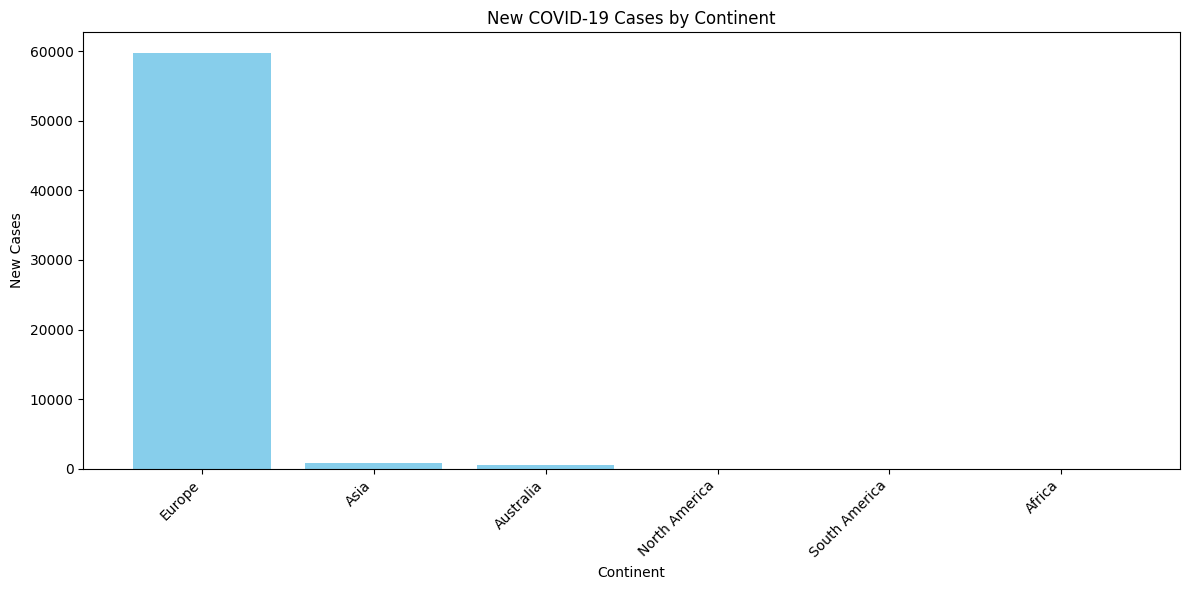

In [18]:
import matplotlib.pyplot as plt

continents = ['Europe', 'Asia', 'South America', 'North America', 'Africa', 'Australia']
filtered_df = df[df['Country'].isin(continents)]

sorted_df = filtered_df.sort_values(by='New Cases', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Country'], sorted_df['New Cases'], color='skyblue')

plt.title('New COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('New Cases')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

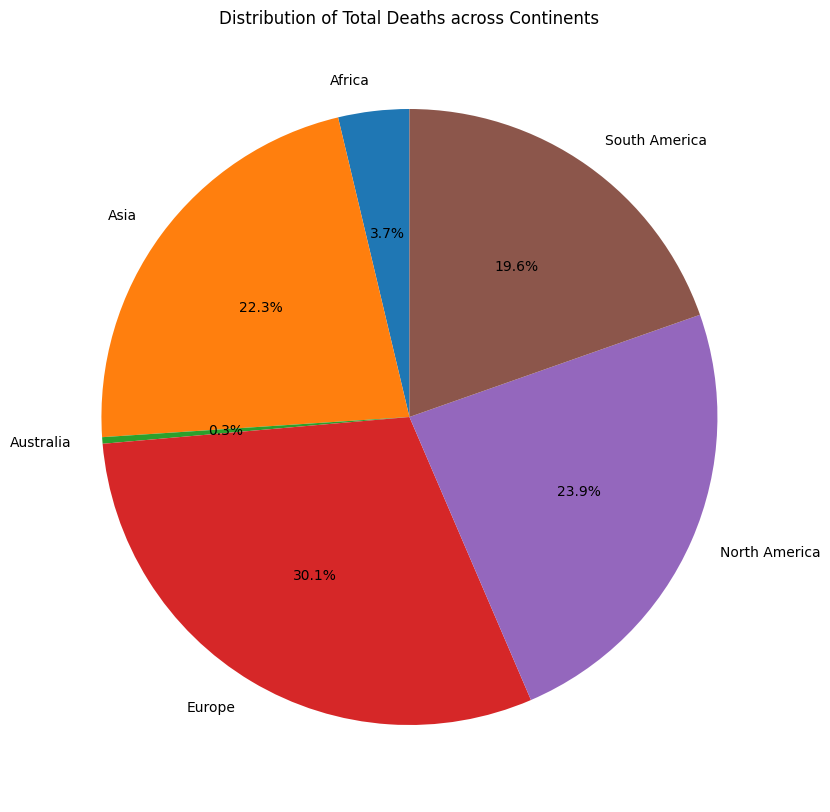

In [19]:
total_deaths_by_country = filtered_df.groupby('Country')['Total Deaths'].sum()

plt.figure(figsize=(10, 10))
plt.pie(total_deaths_by_country, labels=total_deaths_by_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Deaths across Continents')
plt.show()

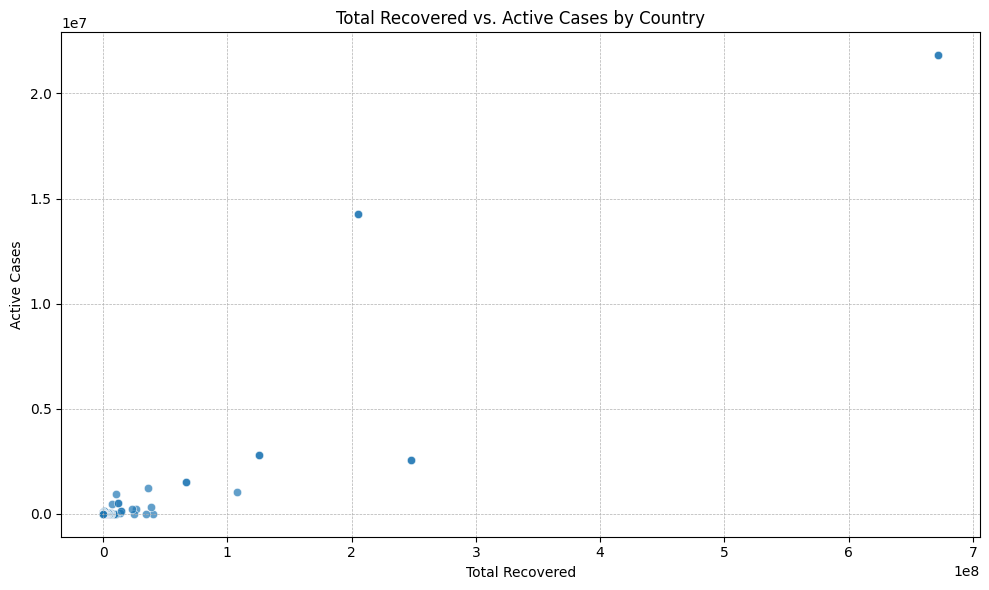

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Total Recovered'], df['Active Cases'], alpha=0.7, edgecolors="w", linewidth=0.5)

plt.title('Total Recovered vs. Active Cases by Country')
plt.xlabel('Total Recovered')
plt.ylabel('Active Cases')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


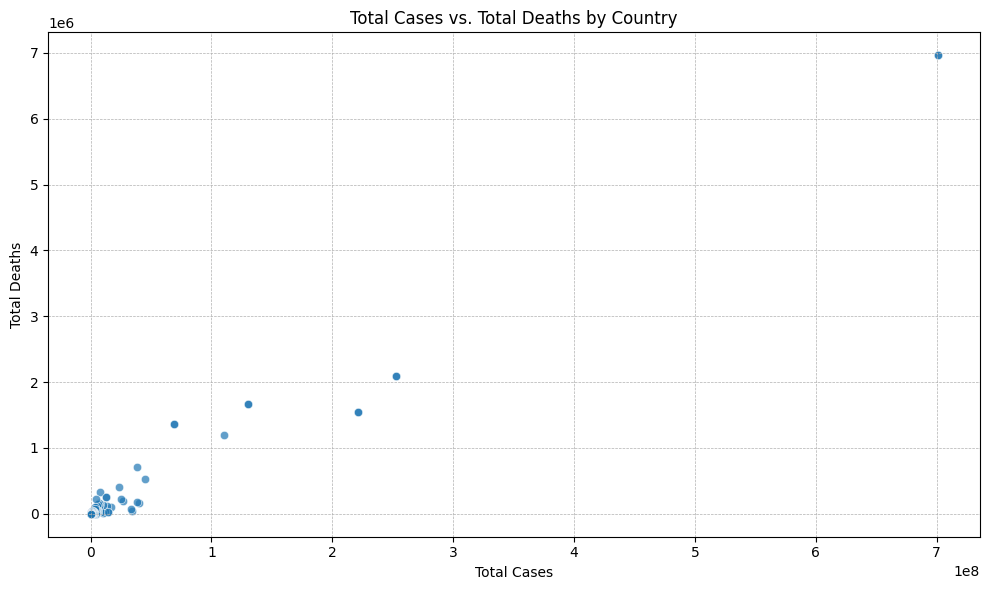

In [21]:
import matplotlib.pyplot as plt

filtered_df = df.dropna(subset=['Total Cases', 'Total Deaths'])

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Total Cases'], filtered_df['Total Deaths'], alpha=0.7, edgecolors="w", linewidth=0.5)

plt.title('Total Cases vs. Total Deaths by Country')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


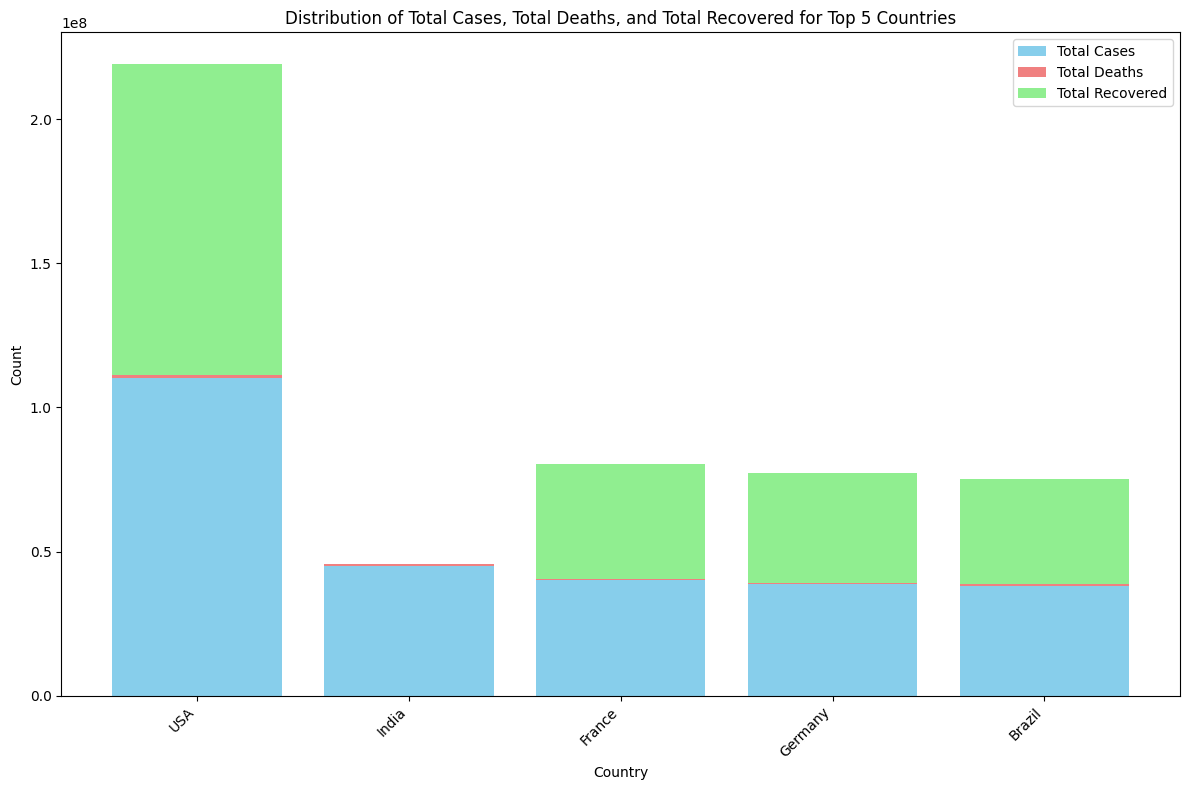

In [22]:
top_5_countries = df[~df['Country'].isin(['World', 'Europe', 'Asia', 'South America', 'North America','Total:'])].sort_values(by='Total Cases', ascending=False).head(5)


plt.figure(figsize=(12, 8))
plt.bar(top_5_countries['Country'], top_5_countries['Total Cases'], label='Total Cases', color='skyblue')
plt.bar(top_5_countries['Country'], top_5_countries['Total Deaths'], label='Total Deaths', color='lightcoral', bottom=top_5_countries['Total Cases'])
plt.bar(top_5_countries['Country'], top_5_countries['Total Recovered'], label='Total Recovered', color='lightgreen', bottom=top_5_countries['Total Cases'] + top_5_countries['Total Deaths'])

plt.title('Distribution of Total Cases, Total Deaths, and Total Recovered for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

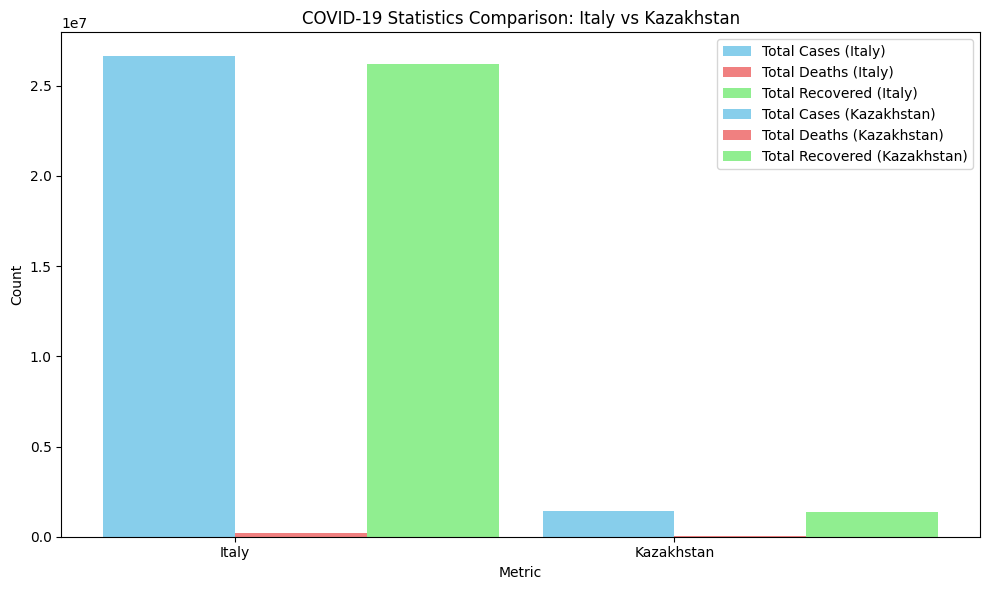

In [23]:
italy_kazakhstan_df = df[df['Country'].isin(['Italy', 'Kazakhstan'])]

country_indices = {country: index for index, country in enumerate(italy_kazakhstan_df['Country'].unique())}

bar_width = 0.3

plt.figure(figsize=(10, 6))

for country in ['Italy', 'Kazakhstan']:
    indices = [country_indices[country]]
    plt.bar(np.array(indices) - bar_width/2, italy_kazakhstan_df[italy_kazakhstan_df['Country'] == country]['Total Cases'], bar_width, label=f'Total Cases ({country})', color='skyblue')
    plt.bar(np.array(indices) + bar_width/2, italy_kazakhstan_df[italy_kazakhstan_df['Country'] == country]['Total Deaths'], bar_width, label=f'Total Deaths ({country})', color='lightcoral')
    plt.bar(np.array(indices) + 3*bar_width/2, italy_kazakhstan_df[italy_kazakhstan_df['Country'] == country]['Total Recovered'], bar_width, label=f'Total Recovered ({country})', color='lightgreen')

plt.title('COVID-19 Statistics Comparison: Italy vs Kazakhstan')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.xticks(list(country_indices.values()), list(country_indices.keys()))
plt.legend()
plt.tight_layout()
plt.show()

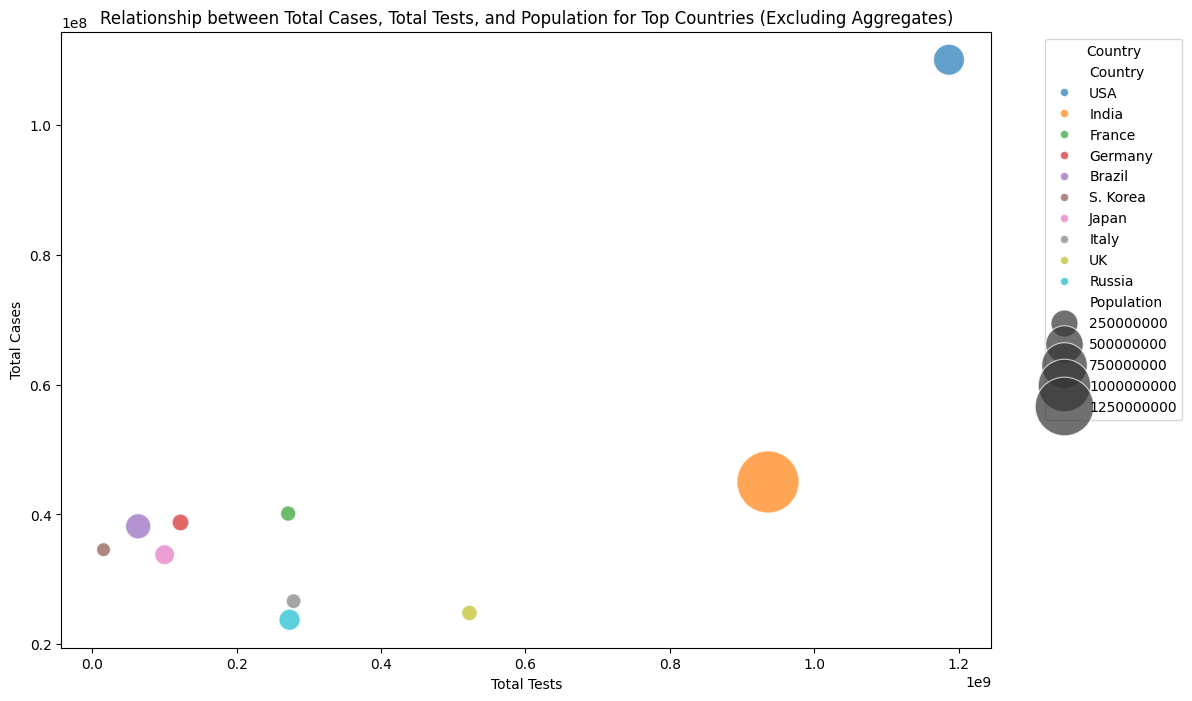

In [24]:
import seaborn as sns

top_countries_df = df[~df['Country'].isin(['World', 'Europe', 'Asia', 'South America', 'North America','Total:'])].sort_values(by='Total Cases', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_countries_df, x='Total Tests', y='Total Cases', hue='Country', size='Population', sizes=(100, 2000), alpha=0.7)

plt.title('Relationship between Total Cases, Total Tests, and Population for Top Countries (Excluding Aggregates)')
plt.xlabel('Total Tests')
plt.ylabel('Total Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Accuracy of the KNN classifier: 0.96


C:\Users\a.talgatkyzy\AppData\Local\Temp\ipykernel_13020\468492346.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test Data')


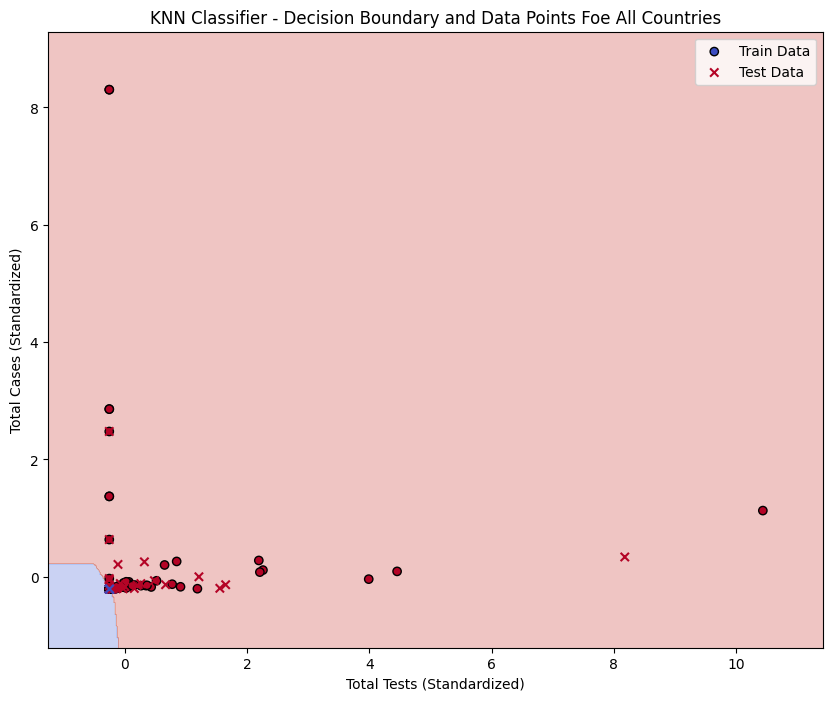

In [25]:
#The code is using a machine learning algorithm (KNN) to predict whether a country will have a high number of COVID-19 cases 
#based on the total number of tests conducted and total cases reported. 
#The decision boundary is like the model's guess on where the division between high and low cases should be.
 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

features = df[['Total Tests', 'Total Cases']].values

threshold_cases = df['Total Cases'].median()
df['High Cases'] = (df['Total Cases'] > threshold_cases).astype(int)
target = df['High Cases'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy:.2f}")

h = .02 
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label='Train Data')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test Data')

plt.xlabel('Total Tests (Standardized)')
plt.ylabel('Total Cases (Standardized)')
plt.title('KNN Classifier - Decision Boundary and Data Points Foe All Countries')
plt.legend()
plt.show()

In [26]:
#In this code I used RandomForest for comparison
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = df[['Total Tests', 'Total Cases']].values
target = (df['Total Cases'] > top_countries_df['Total Cases'].median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the RandomForestClassifier: {accuracy_rf:.2f}")


Accuracy of the RandomForestClassifier: 1.00
